In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data_high = pd.read_json(r'C:\Users\Addy\OneDrive\Dokumente\Subjective_Results\mythesisdbtc4.json')
data_medium = pd.read_json(r'C:\Users\Addy\OneDrive\Dokumente\Subjective_Results\mythesisdbtc3.json')
data_low = pd.read_json(r'C:\Users\Addy\OneDrive\Dokumente\Subjective_Results\mythesisdbtc2.json')

In [3]:
# Concatenate data_low, data_medium, and data_high vertically
combined_data = pd.concat([data_low, data_medium, data_high], ignore_index=True)
combined_data

,Q1,Q2,Q3
0,Good,Good,Good
1,Good,Good,Good
2,Excellent,Excellent,Excellent
3,Excellent,Excellent,Excellent
4,Excellent,Good,Good
5,Excellent,Good,Good
6,Good,Good,Good
7,Excellent,Good,Excellent
8,Good,Excellent,Excellent
9,Excellent,Good,Good


In [4]:
# Define the mapping of categorical labels to numerical values
rating_mapping = {'Bad': 1, 'Poor': 2, 'Fair': 3, 'Good': 4, 'Excellent': 5,"Extreme effort" :1, "Considerable effort" :2,
                  "Moderate effort" :3,"Minor effort" :4 , "No effort": 5,
                  'Yes': 1, 'No': 0}

df = combined_data.replace(rating_mapping)

In [5]:
df.columns = ["OverallQuality" , "VideoQuality","AudioQuality"]

In [6]:
print(df.shape)
print(df.dtypes)
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

(48, 3)
OverallQuality    int64
VideoQuality      int64
AudioQuality      int64
dtype: object


In [7]:
# Calculate the total number of rows in your DataFrame
total_rows = len(df)

# Define the group sizes
group_size = total_rows // 3

# Create a new column 'Group' to categorize the data into 'low,' 'middle,' and 'high'
df['Packetloss'] = ['low'] * group_size + ['middle'] * group_size + ['high'] * (total_rows - 2 * group_size)

# Create a new column 'Group' to categorize the data into 'low,' 'middle,' and 'high'
df['Delay'] = ['low'] * group_size + ['middle'] * group_size + ['high'] * (total_rows - 2 * group_size)

# Display the modified DataFrame with the 'Group' column
df

,OverallQuality,VideoQuality,AudioQuality,Packetloss,Delay
1,4,4,4,low,low
2,4,4,4,low,low
3,5,5,5,low,low
4,5,5,5,low,low
5,5,4,4,low,low
6,5,4,4,low,low
7,4,4,4,low,low
8,5,4,5,low,low
9,4,5,5,low,low
10,5,4,4,low,low


In [8]:
# Define the mapping for label encoding
networklevel_mapping = {'low': 1, 'middle': 2, 'high': 3}
# Apply label encoding to convert the categorical column to numerical
df['Packetloss'] = df['Packetloss'].map(networklevel_mapping)
# Apply label encoding to convert the categorical column to numerical
df['Delay'] = df['Delay'].map(networklevel_mapping)
df


,OverallQuality,VideoQuality,AudioQuality,Packetloss,Delay
1,4,4,4,1,1
2,4,4,4,1,1
3,5,5,5,1,1
4,5,5,5,1,1
5,5,4,4,1,1
6,5,4,4,1,1
7,4,4,4,1,1
8,5,4,5,1,1
9,4,5,5,1,1
10,5,4,4,1,1


In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your data and define the formula
# ...

# Perform two-way ANOVA for OverallQuality
formula_overall = 'OverallQuality ~ Packetloss + Delay + Packetloss:Delay'
model_overall = ols(formula_overall, data=df).fit()
anova_overall = sm.stats.anova_lm(model_overall, typ=2)

# Extract p-values
p_value_packetloss = anova_overall.loc['Packetloss', 'PR(>F)']
p_value_delay = anova_overall.loc['Delay', 'PR(>F)']
p_value_interaction = anova_overall.loc['Packetloss:Delay', 'PR(>F)']

# Convert p-values to decimal notation
p_value_packetloss_decimal = "{:.10f}".format(p_value_packetloss)
p_value_delay_decimal = "{:.10f}".format(p_value_delay)
p_value_interaction_decimal = "{:.10f}".format(p_value_interaction)

# Print the ANOVA results with p-values in decimal notation
print("ANOVA for OverallQuality:")
print(anova_overall)
print(f"\nDecimal Notation P-values:")
print(f"Packetloss: {p_value_packetloss_decimal}")
print(f"Delay: {p_value_delay_decimal}")
print(f"Interaction (Packetloss:Delay): {p_value_interaction_decimal}")


ANOVA for OverallQuality:
                    sum_sq    df          F        PR(>F)
Packetloss        52.53125   1.0  42.449495  5.349198e-08
Delay             52.53125   1.0  42.449495  5.349198e-08
Packetloss:Delay   0.09375   1.0   0.075758  7.843910e-01
Residual          55.68750  45.0        NaN           NaN

Decimal Notation P-values:
Packetloss: 0.0000000535
Delay: 0.0000000535
Interaction (Packetloss:Delay): 0.7843910275


In [10]:
# Performing two-way ANOVA for Audio Quality
formula_overall = 'AudioQuality ~ Packetloss + Delay + Packetloss:Delay'
model_overall = ols(formula_overall, data=df).fit()
anova_overall = sm.stats.anova_lm(model_overall, typ=2)

# Extracting p-values
p_value_packetloss = anova_overall.loc['Packetloss', 'PR(>F)']
p_value_delay = anova_overall.loc['Delay', 'PR(>F)']
p_value_interaction = anova_overall.loc['Packetloss:Delay', 'PR(>F)']

# Converting p-values to decimal notation
p_value_packetloss_decimal = "{:.10f}".format(p_value_packetloss)
p_value_delay_decimal = "{:.10f}".format(p_value_delay)
p_value_interaction_decimal = "{:.10f}".format(p_value_interaction)

# Printing the ANOVA results with p-values in decimal notation
print("ANOVA for Audio Quality:")
print(anova_overall)
print(f"\nDecimal Notation P-values:")
print(f"Packetloss: {p_value_packetloss_decimal}")
print(f"Delay: {p_value_delay_decimal}")
print(f"Interaction (Packetloss:Delay): {p_value_interaction_decimal}")

ANOVA for Audio Quality:
                     sum_sq    df           F        PR(>F)
Packetloss        72.000000   1.0  103.473054  3.038137e-13
Delay             72.000000   1.0  103.473054  3.038137e-13
Packetloss:Delay   4.166667   1.0    5.988024  1.837216e-02
Residual          31.312500  45.0         NaN           NaN

Decimal Notation P-values:
Packetloss: 0.0000000000
Delay: 0.0000000000
Interaction (Packetloss:Delay): 0.0183721636


In [11]:
# Performing two-way ANOVA for Video Quality
formula_overall = 'VideoQuality ~ Packetloss + Delay + Packetloss:Delay'
model_overall = ols(formula_overall, data=df).fit()
anova_overall = sm.stats.anova_lm(model_overall, typ=2)

# Extracting p-values
p_value_packetloss = anova_overall.loc['Packetloss', 'PR(>F)']
p_value_delay = anova_overall.loc['Delay', 'PR(>F)']
p_value_interaction = anova_overall.loc['Packetloss:Delay', 'PR(>F)']

# Converting p-values to decimal notation
p_value_packetloss_decimal = "{:.10f}".format(p_value_packetloss)
p_value_delay_decimal = "{:.10f}".format(p_value_delay)
p_value_interaction_decimal = "{:.10f}".format(p_value_interaction)

# Printing the ANOVA results with p-values in decimal notation
print("ANOVA for Video Quality:")
print(anova_overall)
print(f"\nDecimal Notation P-values:")
print(f"Packetloss: {p_value_packetloss_decimal}")
print(f"Delay: {p_value_delay_decimal}")
print(f"Interaction (Packetloss:Delay): {p_value_interaction_decimal}")

ANOVA for Video Quality:
                     sum_sq    df          F        PR(>F)
Packetloss        52.531250   1.0  46.464988  1.907594e-08
Delay             52.531250   1.0  46.464988  1.907594e-08
Packetloss:Delay   1.260417   1.0   1.114865  2.966628e-01
Residual          50.875000  45.0        NaN           NaN

Decimal Notation P-values:
Packetloss: 0.0000000191
Delay: 0.0000000191
Interaction (Packetloss:Delay): 0.2966627696


In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey's HSD post hoc test for Packetloss
tukey_packetloss = pairwise_tukeyhsd(df['VideoQuality'], df['Packetloss'])
print("\nTukey's HSD Post Hoc Test for Packetloss:")
print(tukey_packetloss)

# Perform Tukey's HSD post hoc test for Delay
tukey_delay = pairwise_tukeyhsd(df['VideoQuality'], df['Delay'])
print("\nTukey's HSD Post Hoc Test for Delay:")
print(tukey_delay)

# Perform Tukey's HSD post hoc test for the interaction term (Packetloss:Delay)
tukey_interaction = pairwise_tukeyhsd(df['VideoQuality'], df['Packetloss:Delay'])
print("\nTukey's HSD Post Hoc Test for Interaction (Packetloss:Delay):")
print(tukey_interaction)









Tukey's HSD Post Hoc Test for Packetloss:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.9375 0.0425 -1.8486 -0.0264   True
     1      3  -2.5625    0.0 -3.4736 -1.6514   True
     2      3   -1.625 0.0002 -2.5361 -0.7139   True
----------------------------------------------------

Tukey's HSD Post Hoc Test for Delay:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.9375 0.0425 -1.8486 -0.0264   True
     1      3  -2.5625    0.0 -3.4736 -1.6514   True
     2      3   -1.625 0.0002 -2.5361 -0.7139   True
----------------------------------------------------


KeyError: 'Packetloss:Delay'

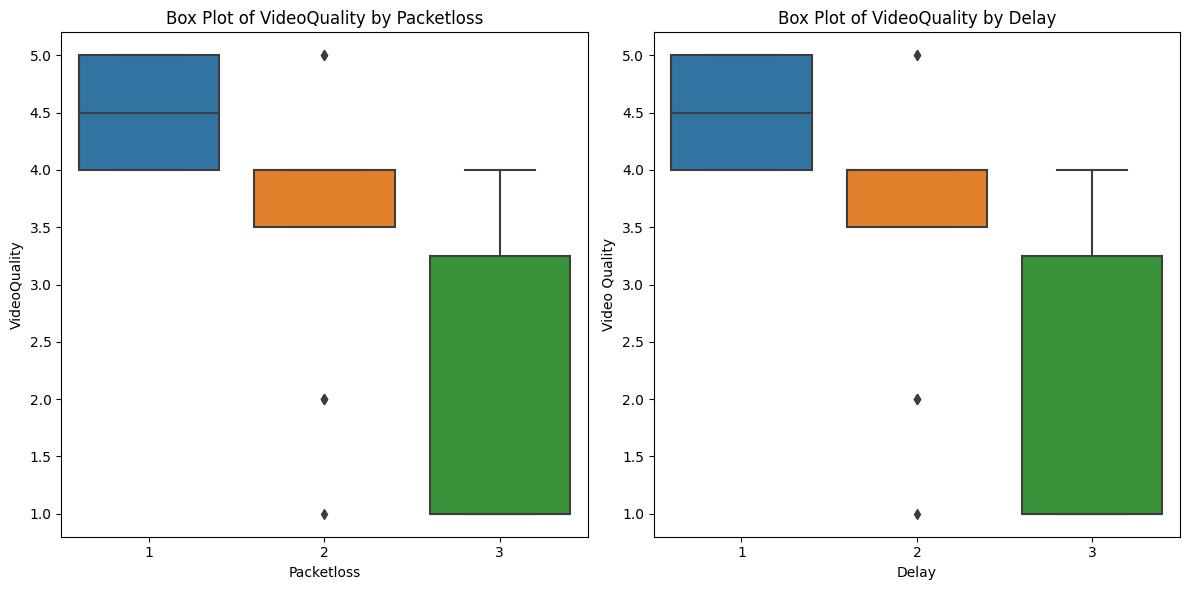

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating box plots for VideoQuality by Packetloss and Delay
plt.figure(figsize=(12, 6))

# Box plot for Packetloss
plt.subplot(1, 2, 1)
sns.boxplot(x='Packetloss', y='VideoQuality', data=df)
plt.title('Box Plot of VideoQuality by Packetloss')
plt.xlabel('Packetloss')
plt.ylabel('VideoQuality')

# Box plot for Delay
plt.subplot(1, 2, 2)
sns.boxplot(x='Delay', y='VideoQuality', data=df)
plt.title('Box Plot of VideoQuality by Delay')
plt.xlabel('Delay')
plt.ylabel('Video Quality')

plt.tight_layout()
plt.show()


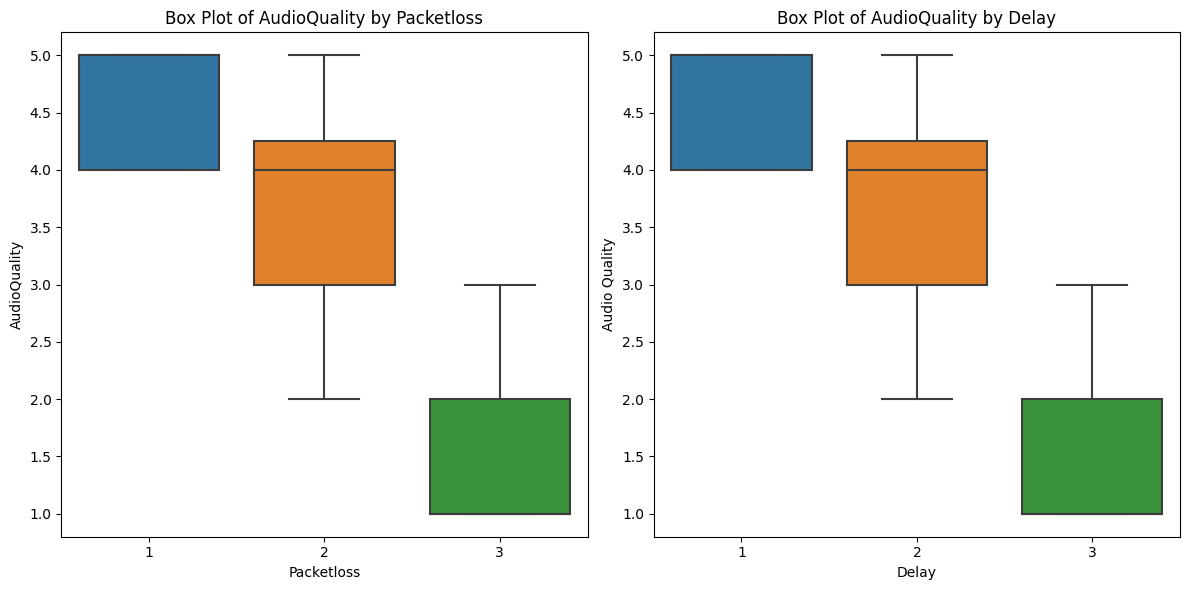

In [13]:
# Creating box plots for Audio Quality by Packetloss and Delay
plt.figure(figsize=(12, 6))

# Box plot for Packetloss
plt.subplot(1, 2, 1)
sns.boxplot(x='Packetloss', y='AudioQuality', data=df)
plt.title('Box Plot of Audio Quality by Packetloss')
plt.xlabel('Packetloss')
plt.ylabel('AudioQuality')

# Box plot for Delay
plt.subplot(1, 2, 2)
sns.boxplot(x='Delay', y='AudioQuality', data=df)
plt.title('Box Plot of Audio Quality by Delay')
plt.xlabel('Delay')
plt.ylabel('Audio Quality')

plt.tight_layout()
plt.show()


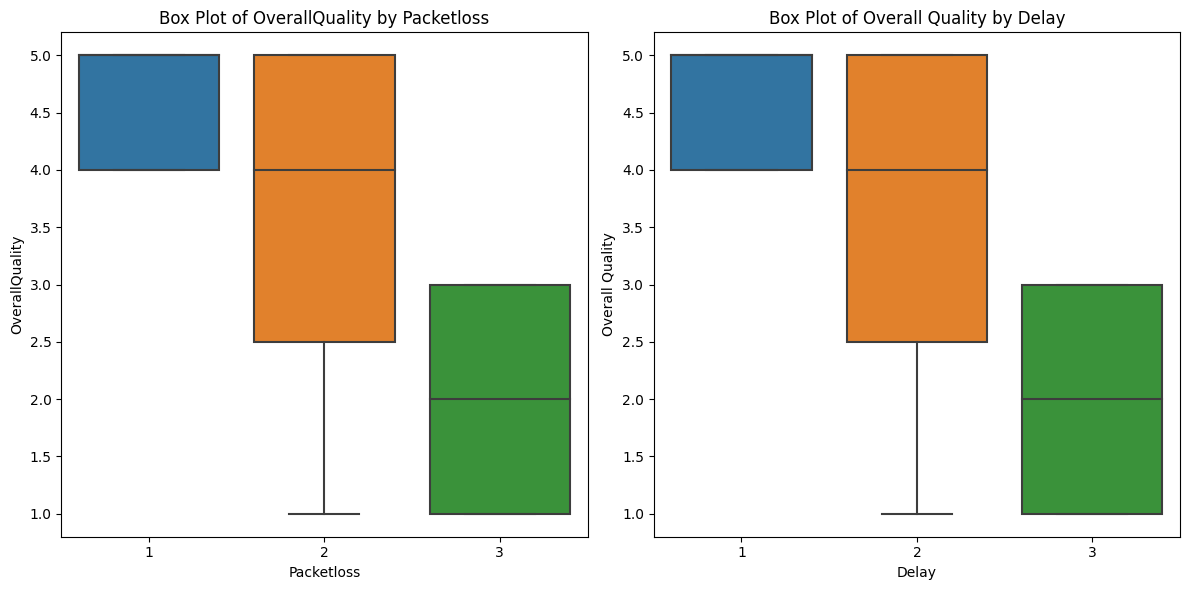

In [14]:
# Creating box plots for OverallQuality by Packetloss and Delay
plt.figure(figsize=(12, 6))

# Box plot for Packetloss
plt.subplot(1, 2, 1)
sns.boxplot(x='Packetloss', y='OverallQuality', data=df)
plt.title('Box Plot of Overall Quality by Packetloss')
plt.xlabel('Packetloss')
plt.ylabel('OverallQuality')

# Box plot for Delay
plt.subplot(1, 2, 2)
sns.boxplot(x='Delay', y='OverallQuality', data=df)
plt.title('Box Plot of Overall Quality by Delay')
plt.xlabel('Delay')
plt.ylabel('Overall Quality')

plt.tight_layout()
plt.show()


In [15]:
# Extractign Delay from dataframe
high_level_delay = df[df['Delay'] == 3]
high_level_packetloss = df[df['Packetloss'] == 3]

# Calculate Pearson correlation coefficients
correlation_matrix_delay = high_level_delay[['OverallQuality', 'AudioQuality', 'VideoQuality']].corr()

# Print the correlation matrix
print("Correlation Matrix for 'High Delay")
print(correlation_matrix_delay)


Correlation Matrix for 'High Delay
                OverallQuality  AudioQuality  VideoQuality
OverallQuality        1.000000      0.508685      0.669423
AudioQuality          0.508685      1.000000      0.645579
VideoQuality          0.669423      0.645579      1.000000


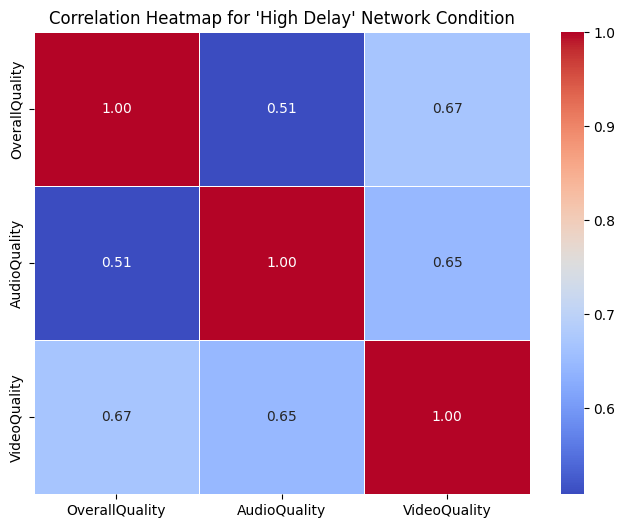

In [16]:
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_delay, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for 'High Delay' Network Condition")
plt.show()


In [17]:
Mid_level_packetloss = df[df['Packetloss'] == 2]

In [18]:
# Calculating Pearson correlation coefficients
correlation_matrix_packetloss_mid = Mid_level_packetloss[['OverallQuality', 'AudioQuality', 'VideoQuality']].corr()

# Print the correlation matrix
print("Correlation Matrix for 'Medium Packet loss' Network Condition:")
print(correlation_matrix_packetloss_mid)

Correlation Matrix for 'Medium Packet loss' Network Condition:
                OverallQuality  AudioQuality  VideoQuality
OverallQuality        1.000000      0.852604      0.897599
AudioQuality          0.852604      1.000000      0.633526
VideoQuality          0.897599      0.633526      1.000000


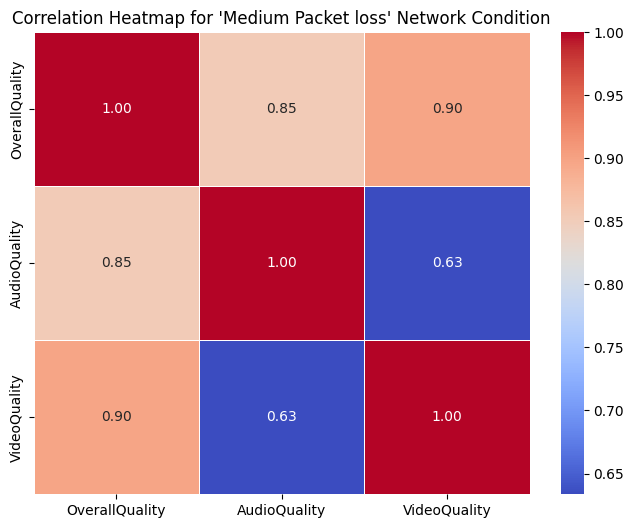

In [19]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_packetloss_mid, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for 'Medium Packet loss' Network Condition")
plt.show()


In [20]:
# Extracting'
low_level_packetloss = df[df['Packetloss'] == 1]
# Calculate Pearson correlation coefficients
correlation_matrix_packetloss_low = low_level_packetloss[['OverallQuality', 'AudioQuality', 'VideoQuality']].corr()

# Print the correlation matrix
print("Correlation Matrix for 'low Packet loss' Network Condition:")
print(correlation_matrix_packetloss_low)

Correlation Matrix for 'low Packet loss' Network Condition:
                OverallQuality  AudioQuality  VideoQuality
OverallQuality        1.000000     -0.015873      0.125988
AudioQuality         -0.015873      1.000000      0.629941
VideoQuality          0.125988      0.629941      1.000000


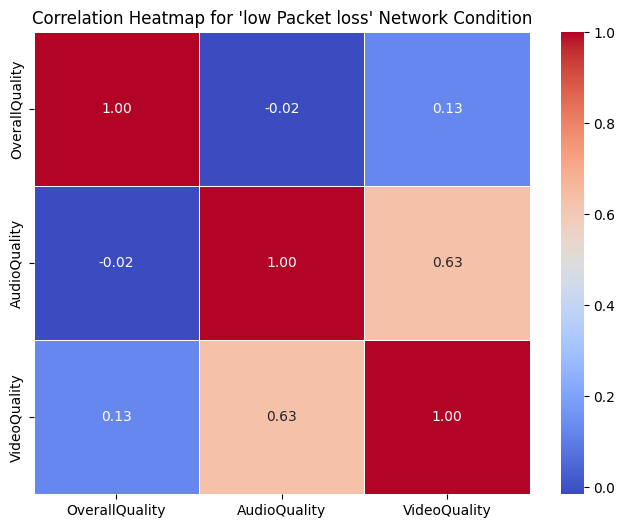

In [21]:

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_packetloss_low, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for 'low Packet loss' Network Condition")
plt.show()